# ####import all packages


In [3]:

import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn import preprocessing, model_selection
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization

Using TensorFlow backend.
C:\Users\shubham\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shubham\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shubham\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shubham\Miniconda3\lib\site-packages\tensorflow\python\framewo

# Read dataset

In [4]:
df=pd.read_csv('database.csv')

In [5]:
df.shape[0]/2

23163.5

In [6]:
df.columns

Index(['Text', 'Sentiment_score', 'Sentiment'], dtype='object')

# Converting 0,1,2 into categorical form [0,0,1] for 0 [0,1,0] for 1 and [1,0,0] for 2

In [7]:

data=df['Sentiment_score']
data = np.array(data)
# one hot encode
encoded = to_categorical(data)


# Removing custom_stopwords and Tokenzing all text

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
filtered_sentence=[]  
stop_words = set(stopwords.words('english')) 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
custom_words=['ss','id','c','number','partner','e','b','per','cid','sr','png','x','ccw','rcs','plex','k','de','en','rma','close','p','n','f','g','ed','japan','ltd','r','el','mfg','th','ex','cs','case','deal','l']
for i in custom_words:
    stop_words.add(i)

In [10]:
def stop_me(x):
    word_tokens = word_tokenize(x) 
    k = [w for w in word_tokens if not w in stop_words] 
    k=" ".join(k)
    return(k)

In [11]:
df['Text']=df['Text'].apply(lambda x: stop_me(x))

In [52]:
from gensim.models  import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [77]:
filtered_sentence=[]

for i in df['Text']:
    filtered_sentence.append(i.split())

In [84]:
import gensim
w2v_model=gensim.models.Word2Vec(filtered_sentence,min_count=25,size=50)

In [87]:
words=list(w2v_model.wv.vocab)

In [93]:
words

['hello',
 'michael',
 'hope',
 'great',
 'took',
 'ownership',
 'assisting',
 'understand',
 'request',
 'get',
 'changed',
 'see',
 'already',
 'assigned',
 'please',
 'refer',
 'screenshot',
 'attached',
 'helped',
 'questions',
 'advise',
 'ic',
 'support',
 'help',
 'following',
 'guide',
 'resolve',
 'issue',
 'dear',
 'noticed',
 'ordered',
 'part',
 'dna',
 'sold',
 'school',
 'distributor',
 'sales',
 'order',
 'line',
 'sw',
 'requires',
 'mandatory',
 'attachment',
 'finding',
 'valid',
 'hardware',
 'match',
 'systems',
 'could',
 'team',
 'either',
 'place',
 'needed',
 'apply',
 'information',
 'add',
 'appropriate',
 'hw',
 'pos',
 'dashboard',
 'respond',
 'let',
 'us',
 'know',
 'pleted',
 'need',
 'assistance',
 'hi',
 'atanas',
 'able',
 'ok',
 'domain',
 'previously',
 'thank',
 'ing',
 'xaas',
 'verified',
 'provided',
 'wo',
 'submitted',
 'yet',
 'reason',
 'visible',
 'needs',
 'submit',
 'remain',
 'disposal',
 'additional',
 'kind',
 'good',
 'morning',
 'rega

In [94]:
w2v_model.wv.most_similar('resolve')

[('earliest', 0.6208274960517883),
 ('resolved', 0.6055682301521301),
 ('perform', 0.5999540090560913),
 ('resolution', 0.589184045791626),
 ('resolving', 0.584869921207428),
 ('proceeding', 0.5797916650772095),
 ('proceed', 0.5763680934906006),
 ('investigate', 0.570891797542572),
 ('escalated', 0.565718412399292),
 ('related', 0.5594576597213745)]

In [122]:
w2v_model.save('word2vec.bin')
# load model
new_model = Word2Vec.load('word2vec.bin')
#print(new_model)

In [127]:
new_model.wv.vocab.items()

dict_items([('hello', <gensim.models.keyedvectors.Vocab object at 0x00000217E642BB88>), ('michael', <gensim.models.keyedvectors.Vocab object at 0x00000217E642B9C8>), ('hope', <gensim.models.keyedvectors.Vocab object at 0x00000217E642BC48>), ('great', <gensim.models.keyedvectors.Vocab object at 0x00000217E642BD08>), ('took', <gensim.models.keyedvectors.Vocab object at 0x00000217EC1C5FC8>), ('ownership', <gensim.models.keyedvectors.Vocab object at 0x00000217E652EAC8>), ('assisting', <gensim.models.keyedvectors.Vocab object at 0x00000217E652ED08>), ('understand', <gensim.models.keyedvectors.Vocab object at 0x00000217E652EE48>), ('request', <gensim.models.keyedvectors.Vocab object at 0x00000217E652EEC8>), ('get', <gensim.models.keyedvectors.Vocab object at 0x00000217E652E1C8>), ('changed', <gensim.models.keyedvectors.Vocab object at 0x00000217E652EA08>), ('see', <gensim.models.keyedvectors.Vocab object at 0x00000217E652EF88>), ('already', <gensim.models.keyedvectors.Vocab object at 0x00000

In [12]:
tokenizer_object=Tokenizer(num_words=1000)
total_text=df['Text'].values
tokenizer_object.fit_on_texts(total_text)

In [13]:
l=tokenizer_object.word_counts

In [14]:
#top_1k_vocab=dict(sorted(l.items(), key=lambda x: x[1],reverse=True)[0:1000])

In [15]:
def length_Str(x):
    return(len(x.split()))

In [16]:
k=df['Text'].apply(lambda x: length_Str(x))

Text(0.5, 0, 'Sentences')

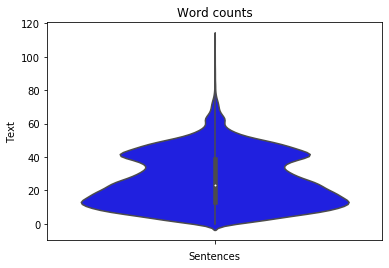

In [17]:

fig=plt.figure()
plt.subplot()
plt.title("Word counts")
ax=sns.violinplot(y=k,color='b')
plt.xlabel('Sentences')


# Splitting dataset in to x and y train and test form

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df['Text'].values,encoded,test_size = 0.30, random_state = 0)

# setting maximum length of each sentence, vocab size= collection of each unique word in the tokenizer object

In [19]:
max_length=50
vocab_size=len(tokenizer_object.word_index)+1

# Arranging each sentence's word with respective their index in tokenizer_obj
example: 'hello': 27 in tokenizer_obj.word_index then any sentence which starts with hello will have [27,x,xx,xxx] sequence

In [20]:
X_train_tokens=tokenizer_object.texts_to_sequences(X_train)
X_test_tokens=tokenizer_object.texts_to_sequences(X_test)



# Padding the each sentence to 100 . Post padding means adding zeros after the end of sentences

In [21]:

X_train_pad=pad_sequences(X_train_tokens,maxlen=max_length,padding='post')
X_test_pad=pad_sequences(X_test_tokens,maxlen=max_length,padding='post')

In [22]:
print(vocab_size)

38894


In [23]:
from numpy import array
from numpy import asarray
from numpy import zeros

###import glove of 6b.100dimension
glove_file = open('C:\\Users\\shubham\\Documents\\Shubham work\\Code work\\focus-dl\\Untitled Folder\\glove.6B\\glove.6B.100d.txt', encoding="utf8")



In [24]:
#creating dictionary to stroe key as word and values as vectors from golove file)
embedding_dict = dict()
for i in glove_file:
    #splitting each word and vectors with blank space
    obs=i.split()
    #obs[0] takes only word not vector
    word=obs[0]
    #includes only vector of word not word include
    vector_dim=asarray(obs[1:],dtype='float32')
    ##adding to word and values one by one
    embedding_dict[word]=vector_dim


In [25]:
#vocab_size_l=1000
##creating embedding matrix of vocabsize *100. 3802 vectros of size 100 each
embedding_matrix = np.zeros((vocab_size, 100))


In [26]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
for word, index in tokenizer_object.word_index.items():
    #.get(word) means get the values of that particular word(vectors) (value: weights or embedded vectors)
    embedding_vector=embedding_dict.get(word)
    ##if it's present, then put vector into empty embedding_vector of vocab_size*100
    if embedding_vector is not None:
        embedding_matrix[index]=embedding_vector

In [28]:
#embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)

In [29]:
from keras.initializers import glorot_uniform
import keras
embedding_dtm=100
model=Sequential()
#model.add(Embedding(1000,embedding_dtm,input_length=max_length,init='glorot_uniform'))
model.add(Embedding(vocab_size,embedding_dtm,weights=[embedding_matrix],init='glorot_uniform'))
model.add(LSTM(units=32,dropout=0.2,recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dense(3,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\shubham\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(38894, 100, weights=[array([[ ..., embeddings_initializer="glorot_uniform")`
  


In [30]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.adam(clipnorm=1.),metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         3889400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 3,906,651
Trainable params: 3,906,587
Non-trainable params: 64
_________________________________________________________________
None


In [31]:
history=model.fit(X_train_pad,y_train,batch_size=128,epochs=25,validation_data=(X_test_pad,y_test),verbose=True) 

Instructions for updating:
Use tf.cast instead.
Train on 32428 samples, validate on 13899 samples
Epoch 1/25
32428/32428 [==============================] - 75s 2ms/step - loss: 0.9672 - accuracy: 0.5387 - val_loss: 0.9307 - val_accuracy: 0.5925
Epoch 2/25
32428/32428 [==============================] - 67s 2ms/step - loss: 0.8551 - accuracy: 0.6187 - val_loss: 0.8074 - val_accuracy: 0.6766
Epoch 3/25
32428/32428 [==============================] - 62s 2ms/step - loss: 0.7721 - accuracy: 0.6688 - val_loss: 0.7210 - val_accuracy: 0.6803
Epoch 4/25
32428/32428 [==============================] - 61s 2ms/step - loss: 0.7130 - accuracy: 0.6862 - val_loss: 0.6694 - val_accuracy: 0.7052
Epoch 5/25
32428/32428 [==============================] - 62s 2ms/step - loss: 0.6618 - accuracy: 0.7095 - val_loss: 0.6254 - val_accuracy: 0.7306
Epoch 6/25
32428/32428 [==============================] - 64s 2ms/step - loss: 0.6258 - accuracy: 0.7234 - val_loss: 0.5968 - val_accuracy: 0.7420
Epoch 7/25
32428/324

In [32]:
model.save_weights("model.h5_relu")

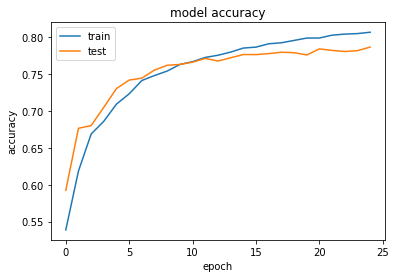

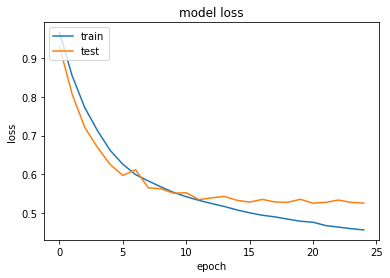

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

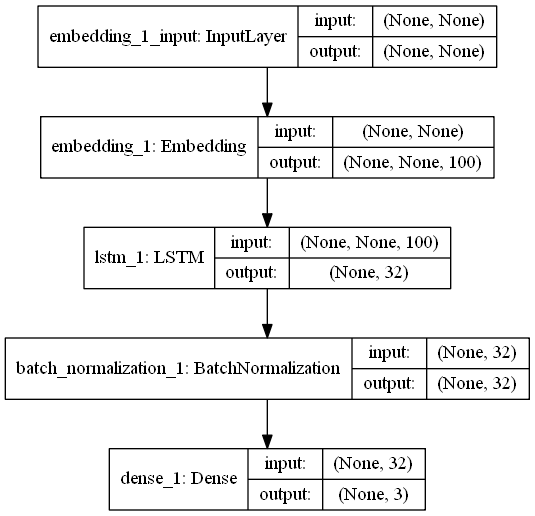

In [34]:

from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)

In [35]:
#model.get_config()
l1=model.layers[0].get_weights()
l2=model.layers[1].get_weights()
l3=model.layers[2].get_weights()


In [36]:
#np.hstack(l2)
def get_weightsarr(l):
    j=[]
    for i in l:
        for k in i:
            try:
                for p in k:
                    j.append(p)
            except TypeError:
                    j.append(k)
    return(j)
            
            

In [37]:
l1=get_weightsarr(l1)
l2=get_weightsarr(l2)
l3=get_weightsarr(l3)

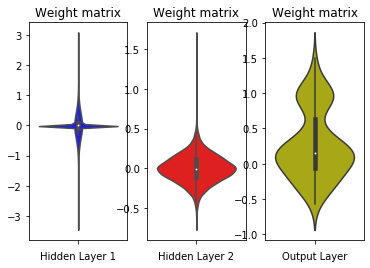

In [38]:
import seaborn as sns
fig=plt.figure()
plt.subplot(1,3,1)
plt.title("Weight matrix")
ax=sns.violinplot(y=l1,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
plt.title("Weight matrix")
ax= sns.violinplot(y=l2,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
plt.title("Weight matrix")
ax=sns.violinplot(y=l3,color='y')
plt.xlabel('Output Layer')
plt.show()

In [39]:
score, acc = model.evaluate(X_test_pad, y_test, batch_size=128)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy: {0:.2%}".format(acc))

13899/13899 [==============================] - 5s 340us/step
Test score: 0.5252948922856745
Test accuracy: 0.7867472767829895
Accuracy: 78.67%


In [40]:

#predict
predicted=model.predict(X_test_pad)
predicted = np.argmax(predicted, axis=1)

In [41]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [43]:
#Confution Matrix and Classification Report
#Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')

print('Classification Report')
target_names = ['Neutral', 'Positive', 'Negative']
print(classification_report(y_classes, predicted, target_names=target_names))

Confusion Matrix
Classification Report
              precision    recall  f1-score   support

     Neutral       0.80      0.86      0.83      8261
    Positive       0.79      0.75      0.77      3280
    Negative       0.71      0.57      0.63      2358

   micro avg       0.79      0.79      0.79     13899
   macro avg       0.77      0.73      0.74     13899
weighted avg       0.78      0.79      0.78     13899



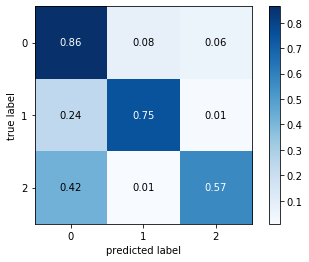

In [44]:
multi_class_confusion_mat=np.array(confusion_matrix(y_classes, predicted))

fig, ax = plot_confusion_matrix(conf_mat=multi_class_confusion_mat,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True)
plt.show()

In [948]:
x=pd.DataFrame(X_test)
y=pd.DataFrame(y_classes)
test=pd.concat([x,y],axis=1)
test.to_csv("test.csv")